# Laden der restlichen Reibdaten
zunächst werden alle Daten aus values_ncprogram geladen, während die Reibe aktiv war

In [8]:
import importbib
import mongodb_connection
import pandas as pd
from datetime import datetime, timedelta
from pymongo import MongoClient
import pymongo
import matplotlib.pyplot as plt

In [ ]:
client = MongoClient(mongodb_connection.connectionstring)
db = client.DMG_CELOS_MOBILE_V3_CA
collection = db["values_ncprogram"]
cursor = collection.find({"toolNo":"RA_12H7"}).sort([("timeStamp",pymongo.ASCENDING)]).limit(192334-92308).batch_size(1000)
dfNewestLoaded = pd.DataFrame(columns=['_id','ValueID','value','timeStamp','progName','toolNo'])
i = 0
for item in cursor:
    dfNewestLoaded.loc[i] = [item['_id'],item['ValueID'],item['value_number'],item['timeStamp'], item['progName'],item['toolNo']]
    if i%1000 == 0:
        print(i,end=', ')
    i=i+1
print(df.shape)
df.head()

0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 

In [3]:
# ACHTUNG: mongodb-download! Nur ausführen, wenn anders nicht möglich. Ansonsten einfach nächste Zelle ausführen, die die exportierte csv-Datei einließt
client = MongoClient(mongodb_connection.connectionstring)
db = client.DMG_CELOS_MOBILE_V3_CA
collection = db["values_ncprogram"]
cursor = collection.find({
    'toolNo' : 'RA_12H7'
}).batch_size(10000)
df = pd.DataFrame(columns=['_id','ValueID','value','timeStamp','progName','toolNo'])
i = 0
for item in cursor:
    df.loc[i] = [item['_id'],item['ValueID'],item['value_number'],item['timeStamp'], item['progName'],item['toolNo']]
    if i%1000 == 0:
        print(i,end=', ')
    i=i+1
print(df.shape)
df.head()
df.to_csv("csv_Files/2019-12-09_NCPROGRAM_RA12H7_COMPLETE.csv",encoding="utf-8",index=False)

0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, (92308, 6)


,_id,ValueID,value,timeStamp,progName,toolNo
0,5dd4ef4d8e15b312f811fd42,12430012063.Channel1.Feed_Axis,80.000004,2019-11-20 07:47:36.557,WZG_MESSEN_L.MPF,RA_12H7
1,5dd4ef4d8e15b312f811fd43,12430012063.Channel1.Feed_Override,0.200000,2019-11-20 07:47:36.558,WZG_MESSEN_L.MPF,RA_12H7
2,5dd4ef4d8e15b312f811fd46,12430012063.Channel1.Program_Feed,80.000004,2019-11-20 07:47:36.559,WZG_MESSEN_L.MPF,RA_12H7
3,5dd4ef4e8e15b312f811fd4c,12430012063.Channel1.Feed_Axis,581.360015,2019-11-20 07:47:37.031,WZG_MESSEN_L.MPF,RA_12H7
4,5dd4ef4e8e15b312f811fd4d,12430012063.Channel1.Feed_Override,4.000000,2019-11-20 07:47:37.032,WZG_MESSEN_L.MPF,RA_12H7


In [5]:
df = pd.read_csv("csv_Files/2019-12-09_NCPROGRAM_RA12H7_COMPLETE.csv", encoding="utf-8")

In [7]:
df.timeStamp = pd.to_datetime(df.timeStamp)
df.dtypes

_id                  object
ValueID              object
value               float64
timeStamp    datetime64[ns]
progName             object
toolNo               object
dtype: object

In [26]:
lstDiff = []
for i in range(0,len(dfFirst)):
    diffValue = min((dfFirst.iloc[i,:].timeStamp-dfSecond.iloc[i,:].timeStamp).total_seconds(), 100)
    lstDiff.append(diffValue)

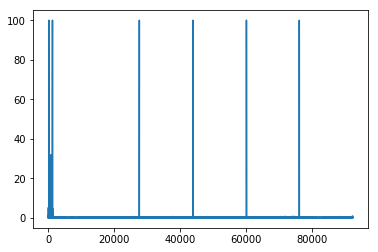

In [27]:
plt.plot(lstDiff)
plt.show()